<a href="https://colab.research.google.com/github/fakhruddinarif/imgpro-compvis/blob/main/modul7/modul7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
def convulution2d(image, kernel, padding=0, strides=1):
  img = np.zeros((image.shape[0], image.shape[1]))

  for i in range(1,image.shape[0] - 3):
        for j in range(1,image.shape[1]-3):
          img[i][j] = image[i-1][j-1]*kernel[0][0]+image[i-1][j+1]*kernel[0][1]+image[i-1,j]*kernel[0][2]+image[i][j-1]*kernel[1][0]+image[i][j]*kernel[1][1]+image[i][j+1]*kernel[1][2]+image[i+1][j-1]*kernel[2][0]+image[i+1][j]*kernel[2][1]+image[i+1][j+1]*kernel[2][2]

  return img


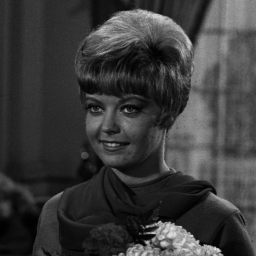

256
253
256
253


In [ ]:
img = cv.imread('/content/drive/MyDrive/imgpro_compvis/Salinan female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

print(img_gray.shape[0])
print(img_gray.shape[0]-3)
print(img_gray.shape[1])
print(img_gray.shape[1]-3)

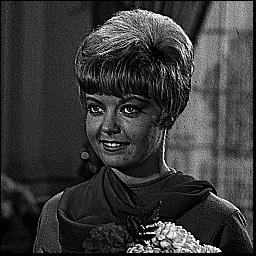

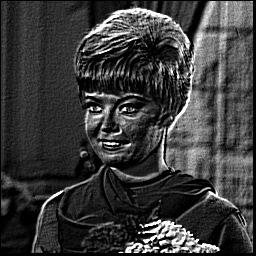

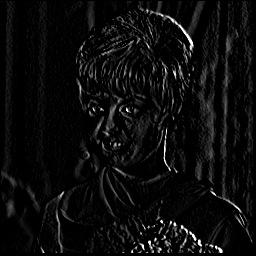

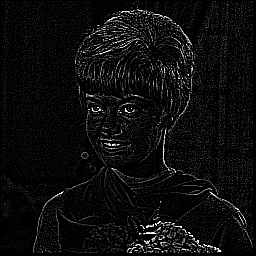

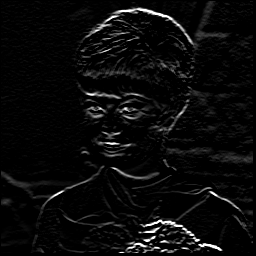

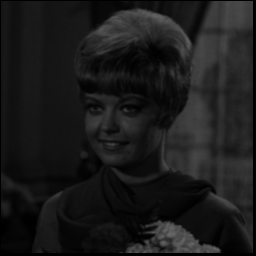

In [ ]:
data = {
    "kernel_sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "kernel_emboss": np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    "left_sobel": np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
    "canny_edge": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "prewitt_edge": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "gaussian_blur": np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]) / 256
}

for i in data:
  cv2_imshow(convulution2d(img_gray, data[i]))

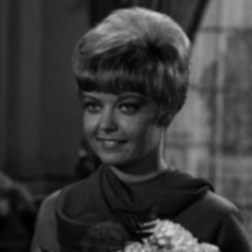

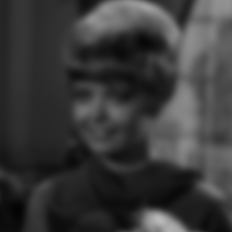

In [ ]:
def convulution_2d_with_sigma(image, kernel, padding=0, strides=1):
  if padding  != 0:
    image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

  height, width = image.shape
  height_kernel, width_kernel = kernel.shape

  output_height = (height - height_kernel) // strides + 1
  output_width = (width - width_kernel) // strides + 1

  output = np.zeros((output_height, output_width))

  for i in range(0, output_height):
    for j in range(0, output_width):
      output[i, j] = np.sum(image[i*strides:i*strides+height_kernel, j*strides:j*strides+width_kernel] * kernel)

  return output

gaussian_blur_5x5 = np.array([[1, 4, 6, 4, 1],
                              [4, 16, 24, 16, 4],
                              [6, 24, 36, 24, 6],
                              [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1]]) / 256
kernel_size = 21

sigma = (kernel_size - 1) / 6

gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel = gaussian_kernel * gaussian_kernel.T

img_gaussian_blur = convulution_2d_with_sigma(img_gray, gaussian_blur_5x5)
img_gaussian_blur_21 = convulution_2d_with_sigma(img_gaussian_blur, gaussian_kernel)

cv2_imshow(img_gaussian_blur)
cv2_imshow(img_gaussian_blur_21)